In [343]:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import GridspecLayout, Button, Layout, Box
import ipywidgets as widgets
import datetime as dt
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Image
from IPython.core.display import HTML

In [344]:
layout = widgets.Layout(display='flex', width='auto', justify_content='center', height='40px') #set width and height

city_dropdown = widgets.Dropdown(
    options=[('Kyoto','japan/Kyoto'), ('Toronto', 'canada/Toronto'), ('Washington','usa/Washington')],
    value='japan/Kyoto',
    #description='City:',
    disabled=False,
    layout = layout
)

In [345]:
previous_city = ''

In [346]:
def make_predictions():
    country_city = city_dropdown.value
    #Next level - update data every day (once, at midnight, for the set of cities I use)

    #Next level - go scrape data each time you choose a location (doesn't need to be from list)
    #get weather of 50 previous days from Washington

        #scrape weather data from desired location
        #process data
        #get predictions of past 10 days

    #For now: show predictions for each city that are stored in memory
    city = country_city.split(r'/',1)[1]

    #TODO: lookup predictions for selected city
    x = np.arange(50)
    y = np.flip(np.arange(50))+np.ones(50)*16
    
    return city,x,y

def plot_predicitions(city,x,y,number_of_predictions = 10):
    print('Showing ' + str(number_of_predictions) + ' most recent predictions for ' + city)

    #show plot of recent predictions
    plt.scatter(x[len(x)-number_of_predictions:],y[len(x)-number_of_predictions:])
    #plt.xlabel('Days')
    plt.ylabel('Predicted number of to Peak Bloom')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %B'))#(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())

    #plt.plot(x,y)
    #plt.figure(figsize=(20,10))

    #TODO: compute offset for x to align with dates?
    plt.scatter(x[len(x)-number_of_predictions:],y[len(x)-number_of_predictions:])
    plt.gcf().autofmt_xdate()
    plt.show()
    
    predicted_date = dt.date.today() + timedelta(days = int(y[-1]))
    print('Upcoming peak bloom in ' + city + ' expected on ' + predicted_date.strftime("%d %B, %Y"))

In [347]:
def get_predicitions():
    city = city_dropdown.value.split(r'/',1)[1]
    
    if city == 'Toronto':
        #predicted_date = dt.date.today() + timedelta(days = int(y[-1]))
        print('Upcoming peak bloom in ' + city + ' expected on May 5, 2020')
    elif city == 'Kyoto':
        print('Upcoming peak bloom in ' + city + ' expected on April 4, 2020')
    elif city == 'Washington':
        print('Upcoming peak bloom in ' + city + ' expected on April 2, 2020')
    #print('Upcoming peak bloom in ' + city + ' expected on ' + predicted_date.strftime("%d %B, %Y"))

In [348]:
layout = widgets.Layout(width='auto', height='40px',justify_content='center') #set width and height

out = widgets.Output()

btn_show_predictions = widgets.Button(
    description='Go',
    disabled=False,
    display='flex',
    flex_flow='column',
    align_items='stretch', 
    button_style='info',
    #button_color = 'purple',
    layout = layout
)
btn_show_predictions.style.button_color = 'pink'

In [349]:
def on_btn_show_predictions_clicked(b):
    #if previous_city != city_dropdown.value:

    #Do something here
    with out:
        #city,x,y = make_predictions()        
        #plot_predicitions(city,x,y)
        
        get_predicitions()
        
        out.clear_output(wait=True)

In [350]:
btn_show_predictions.on_click(on_btn_show_predictions_clicked)

In [351]:
PATH = ""
top_img = Image(filename = PATH + "cherry_blossom_background.png")
top_img.width = '100%'

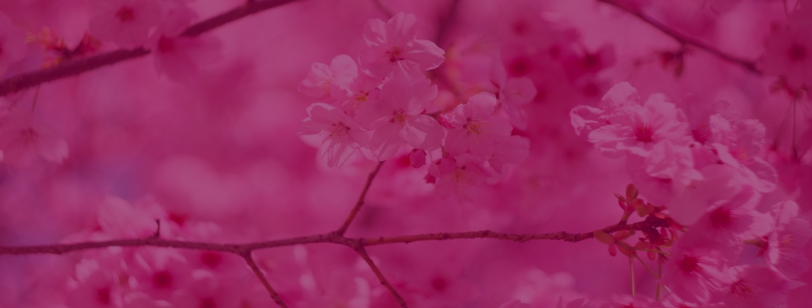

In [352]:
display(top_img)
#display(city_dropdown)

In [353]:
items_layout = Layout( width='auto',display='flex',justify_content='center')     # override the default width of the button to 'auto' to let the button grow


box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='none',
                    width='100%',
                    justify_content='center')

#words = ['correct', 'horse', 'battery', 'staple']
items = [city_dropdown,btn_show_predictions,out]
box = Box(children=items, layout=box_layout)
box

Box(children=(Dropdown(layout=Layout(display='flex', height='40px', justify_content='center', width='auto'), o…